In [13]:
#!/usr/bin/env python
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import pickle
import numpy as np
from encrypt import encrypt
from decrypt import decrypt
import cv2
import time

In [14]:
"""
    sum of the values of 1 stored in matrix is calculated
"""
def sumofpixel(img1,img2):
    eq_matrix = np.invert(img1 == img2)
    return np.sum(eq_matrix)

"""
Finally the above two module is called to calculate the values
"""
def npcrv(img1,img2):
    img1 = Image.open(img1)
    img1 = ImageOps.grayscale(img1)
    img2 = Image.open(img2)
    img1 = np.array(img1)
    img2 = np.array(img2)
    rows, cols = img1.shape
    per = sumofpixel(img1,img2)/(rows*cols)*100
    return per

In [15]:
encrypt('pic2.png','enc_pic2.png','enc_pic2_key.pkl',3)
print(npcrv("images/pic2.png","enc_imgs/enc_pic2.png"))

(225, 224)
99.55357142857143


In [16]:
"""
Unified average avereage inensity changed rate
this code calculates average intensity change rate of pixels
"""
def uaci(img1,img2):
    img1 = Image.open(img1)
    img1 = ImageOps.grayscale(img1)
    img2 = Image.open(img2)
    img1= np.array(img1)
    img2= np.array(img2)
    rows, cols = img1.shape[0], img1.shape[1]
    val = abs((img1-img2)/255.0)
    val = val / (rows*cols) * 100
    val = np.sum(val)
    return val

In [17]:
print(uaci("images/pic2.png","enc_imgs/enc_pic2.png"))

49.835636476812944


# Key sensibility for image encryption using the proposed algorithm.
### Number of pixel change rate (NPCR) between images encrypted with keys K 1 and K 2 (with 1 bit difference).
Encryption using key k1(kr,kc,itr) and k2(kr,kc,itr+1)





In [19]:
val = 0
for round in range(1,101):
    print(round)
    file_name = 'pic3.png'
    enc_file_name = 'enc_pic3_key' + str(round) + '.png'
    key_name = 'pic3_key' + str(round) + '.pkl'
    max_iters = np.random.randint(1,5)
    encrypt(file_name, enc_file_name, key_name, max_iters)

    def shift(a,index,n):
        col = []
        for j in range(len(a)):
            col.append(a[j][index])
        shiftCol = np.roll(col,n)
        for i in range(len(a)):
            for j in range(len(a[0])):
                if(j==index):
                    a[i][j] = shiftCol[i]

    img = Image.open('images/pic3.png')
    img = ImageOps.grayscale(img)
    img = np.array(img)

    key_file = open('keys/pic3_key' + str(round) + '.pkl','rb')
    keys = pickle.load(key_file)
    K_r = keys[0]
    K_c = keys[1]
    max_iters = keys[2] + 1


    print(img.shape)

    n_rows = img.shape[0]
    n_cols = img.shape[1]

    for x in range(max_iters):
        for i in range(n_rows):

            alpha_i = np.sum(img[i])
            m_alpha_i = alpha_i % 2
            shift_amt = - K_r[i] if m_alpha_i else K_r[i]
            np.roll(img[i], shift_amt)
        for i in range(n_cols):

            beta_i = 0
            for j in range (n_rows):
                beta_i += img[j][i]
            m_beta_i = beta_i % 2
            shift_amt = K_c[i] if m_beta_i else - K_c[i]
            shift(img, i, shift_amt)

        for i in range(n_rows):
            for j in range(n_cols):
                if (i%2):
                        img[i][j] ^= K_c[j]
                else:
                        xor_amt = "{0:b}".format(K_c[j])
                        xor_amt = int(xor_amt[::-1],2)
                        img[i][j] ^= xor_amt

        for j in range(n_cols):
            for i in range(n_rows):
                if (j%2 == 0):
                        img[i][j] ^= K_r[i]
                else:
                        xor_amt = "{0:b}".format(K_r[i])
                        xor_amt = int(xor_amt[::-1],2)
                        img[i][j] ^= xor_amt
    img = Image.fromarray(img)
    new_file ='enc_imgs/enc_pic3_key' + str(round) + 'n.png'
    img.save(new_file)
    val += npcrv('enc_imgs/' + enc_file_name,new_file)


print(val/100.0)





1
(168, 300)
(168, 300)
2
(168, 300)
(168, 300)
3
(168, 300)
(168, 300)
4
(168, 300)
(168, 300)
5
(168, 300)
(168, 300)
6
(168, 300)
(168, 300)
7
(168, 300)
(168, 300)
8
(168, 300)
(168, 300)
9
(168, 300)
(168, 300)
10
(168, 300)
(168, 300)
11
(168, 300)
(168, 300)
12
(168, 300)
(168, 300)
13
(168, 300)
(168, 300)
14
(168, 300)
(168, 300)
15
(168, 300)
(168, 300)
16
(168, 300)
(168, 300)
17
(168, 300)
(168, 300)
18
(168, 300)
(168, 300)
19
(168, 300)
(168, 300)
20
(168, 300)
(168, 300)
21
(168, 300)
(168, 300)
22
(168, 300)
(168, 300)
23
(168, 300)
(168, 300)
24
(168, 300)
(168, 300)
25
(168, 300)
(168, 300)
26
(168, 300)
(168, 300)
27
(168, 300)
(168, 300)
28
(168, 300)
(168, 300)
29
(168, 300)
(168, 300)
30
(168, 300)
(168, 300)
31
(168, 300)
(168, 300)
32
(168, 300)
(168, 300)
33
(168, 300)
(168, 300)
34
(168, 300)
(168, 300)
35
(168, 300)
(168, 300)
36
(168, 300)
(168, 300)
37
(168, 300)
(168, 300)
38
(168, 300)
(168, 300)
39
(168, 300)
(168, 300)
40
(168, 300)
(168, 300)
41
(168, 

# Key sensibility for decryption

In [20]:
encrypt('pic5.png','enc_pic5.png','enc_pic5_key.pkl',3)
file_name = 'enc_pic5.png'
save_name = 'dec_pic5_key.png'
key_name = 'enc_pic5_key.pkl'

decrypt(file_name,save_name,key_name)

file_name = 'enc_pic5.png'
save_name = 'dec_pic5_key_mod.png'
key_name = 'enc_pic5_key.pkl'

def shift(a,index,n):
    col = []
    for j in range(len(a)):
        col.append(a[j][index])
    shiftCol = np.roll(col,n)
    for i in range(len(a)):
        for j in range(len(a[0])):
            if(j==index):
                a[i][j] = shiftCol[i]

key_file = open('keys/' + key_name,'rb')
keys = pickle.load(key_file)

K_r = keys[0]
K_c = keys[1]
max_iters = keys[2] + 1

enc_img = Image.open('enc_imgs/' + file_name)
enc_img = np.array(enc_img)

n_rows = enc_img.shape[0]
n_cols = enc_img.shape[1]

for x in range(max_iters):
    for j in range(n_cols):
        for i in range(n_rows):
            if (j%2):
                    enc_img[i][j] ^= K_r[i]
            else:
                    xor_amt = "{0:b}".format(K_r[i])
                    xor_amt = int(xor_amt[::-1],2)
                    enc_img[i][j] ^= xor_amt
    for i in range(n_rows):
        for j in range(n_cols):
            if (i%2):
                    enc_img[i][j] ^= K_c[j]
            else:
                    xor_amt = "{0:b}".format(K_c[j])
                    xor_amt = int(xor_amt[::-1],2)
                    enc_img[i][j] ^= xor_amt

    for i in range(n_cols):

        beta_i = 0
        for j in range (n_rows):
            beta_i += enc_img[j][i]
        m_beta_i = beta_i % 2
        shift_amt = - K_c[i] if m_beta_i else K_c[i]
        shift(enc_img, i, shift_amt)

    for i in range(n_rows):
        alpha_i = np.sum(enc_img[i])
        m_alpha_i = alpha_i % 2
        shift_amt = K_r[i] if m_alpha_i else -K_r[i]
        np.roll(enc_img[i], shift_amt)

if not os.path.exists('dec_imgs'):
    os.mkdir('dec_imgs')

img = Image.fromarray(enc_img)
img.save('dec_imgs/' + save_name)

(200, 200)


# Statistical analysis

## Histogram of original image vs Histogram of encrypted image

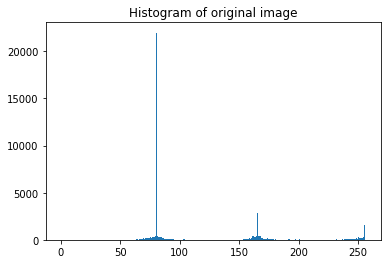

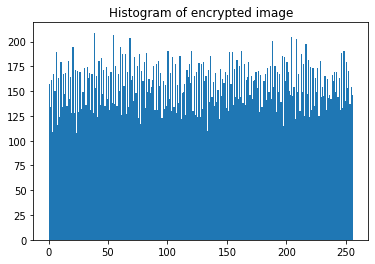

In [17]:
img = cv2.imread('images/pic5.png',0)
plt.hist(img.ravel(),256,[0,256])
plt.title('Histogram of original image')
plt.show()
enc_img = cv2.imread('enc_imgs/enc_pic5.png',0)
plt.hist(enc_img.ravel(),256,[0,256])
plt.title('Histogram of encrypted image')
plt.show()

## Correlation between adjacent pixels that lie horizontally, vertically and diagonally with respect to each other

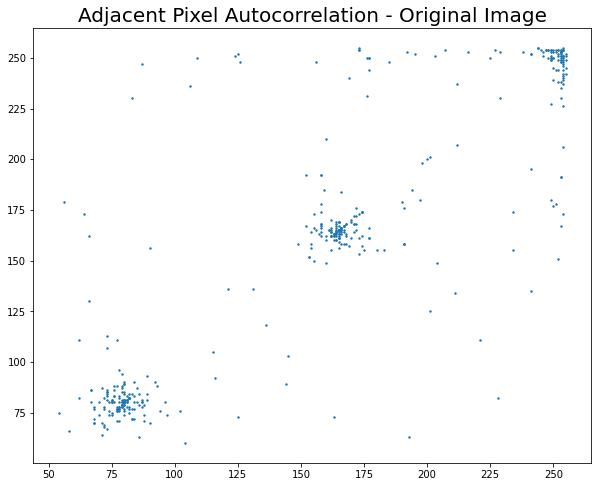

In [24]:
img = Image.open('images/pic5.png')
img = ImageOps.grayscale(img)
img = np.array(img)
rows = img.shape[0]
cols = img.shape[1]

enc_img = Image.open('enc_imgs/enc_pic5.png')
enc_img = np.array(enc_img)

#adjacent pixel in vertical direction
samples_x_orig = []
samples_y_orig = []
samples_x_enc = []
samples_y_enc = []
for i in range(1024):
  x = np.random.randint(0,rows-1)
  y = np.random.randint(0,cols-2)
  samples_x_orig.append(img[x][y])
  samples_y_orig.append(img[x][y+1])
  samples_x_enc.append(enc_img[x][y])
  samples_y_enc.append(enc_img[x][y+1])
plt.figure(figsize=(10,8))
plt.scatter(samples_x_orig,samples_y_orig,s=2)
plt.title('Adjacent (Vertically) Pixel Correlation - Original Image', fontsize=20)
plt.show()


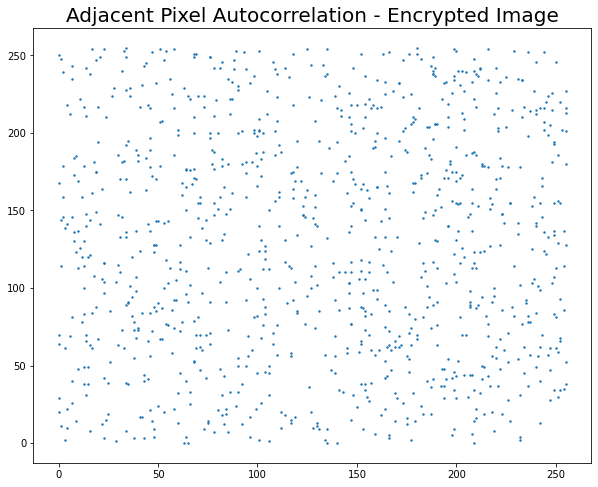

In [25]:
plt.figure(figsize=(10,8))
plt.scatter(samples_x_enc,samples_y_enc,s=2)
plt.title('Adjacent (Vertically) Pixel Autocorrelation - Encrypted Image', fontsize=20)
plt.show()

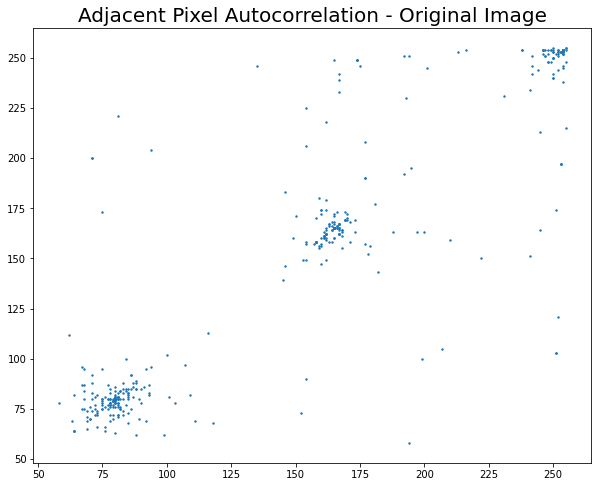

In [26]:
samples_x_orig = []
samples_y_orig = []
samples_x_enc = []
samples_y_enc = []
for i in range(1024):
  x = np.random.randint(0,rows-2)
  y = np.random.randint(0,cols-1)
  samples_x_orig.append(img[x][y])
  samples_y_orig.append(img[x+1][y])
  samples_x_enc.append(enc_img[x][y])
  samples_y_enc.append(enc_img[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x_orig,samples_y_orig,s=2)
plt.title('Adjacent (Horizontally) Pixel Autocorrelation - Original Image', fontsize=20)
plt.show()

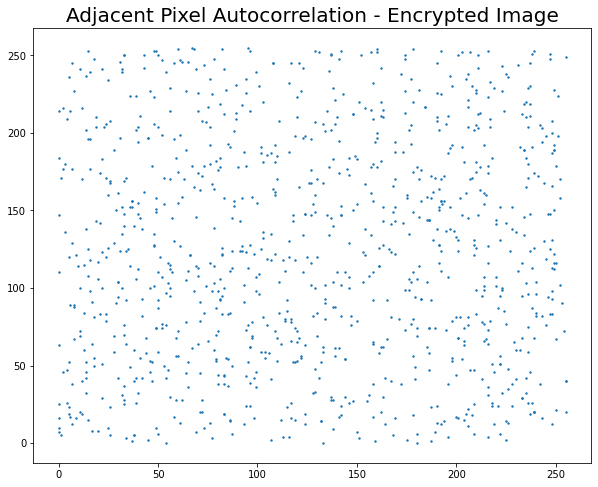

In [27]:
plt.figure(figsize=(10,8))
plt.scatter(samples_x_enc,samples_y_enc,s=2)
plt.title('Adjacent (Horizontally) Pixel Autocorrelation - Encrypted Image', fontsize=20)
plt.show()

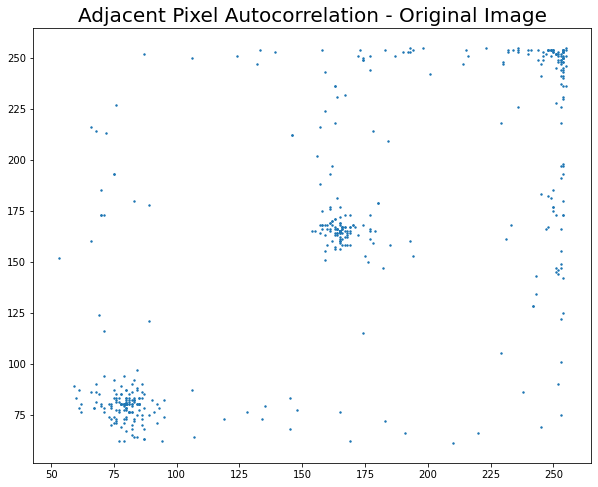

In [28]:
samples_x_orig = []
samples_y_orig = []
samples_x_enc = []
samples_y_enc = []
for i in range(1024):
  x = np.random.randint(0,rows-2)
  y = np.random.randint(0,cols-2)
  samples_x_orig.append(img[x][y])
  samples_y_orig.append(img[x+1][y+1])
  samples_x_enc.append(enc_img[x][y])
  samples_y_enc.append(enc_img[x+1][y+1])
plt.figure(figsize=(10,8))
plt.scatter(samples_x_orig,samples_y_orig,s=2)
plt.title('Adjacent (Diagonally) Pixel Correlation - Original Image', fontsize=20)
plt.show()

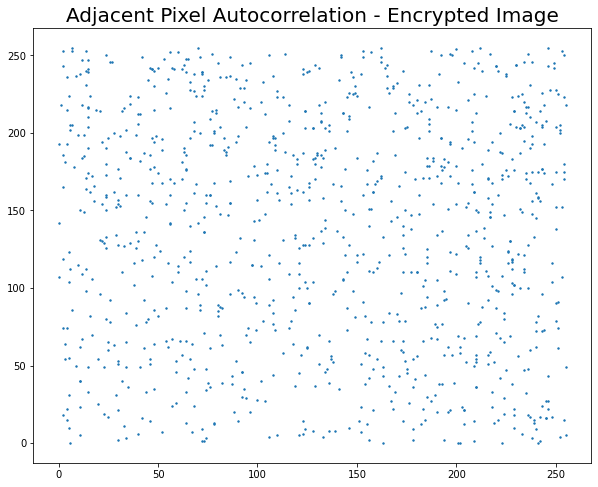

In [29]:
plt.figure(figsize=(10,8))
plt.scatter(samples_x_enc,samples_y_enc,s=2)
plt.title('Adjacent (Horizontally) Pixel Correlation - Encrypted Image', fontsize=20)
plt.show()

## Entropy of original and encrypted images

In [31]:
def entropy(labels, base=None):
    value,counts = np.unique(labels, return_counts=True)
    norm_counts = counts / counts.sum()
    base = e if base is None else base
    return -(norm_counts * np.log(norm_counts)/np.log(base)).sum()#log(a) b=log (c) b÷log (c) a
#
img = Image.open('images/pic5.png')
img = ImageOps.grayscale(img)
img = np.array(img)

enc_img = Image.open('enc_imgs/enc_pic5.png')
enc_img = np.array(enc_img)

entropy_original = entropy(img, 2)
print('Entropy of original image =',entropy_original, 'Sh')
entropy_encrypted = entropy(enc_img, 2)
print('Entropy of encrypted image =',entropy_encrypted, 'Sh')


Entropy of original image = 3.7400081243164687 Sh
Entropy of original image = 7.986302555830232 Sh


# Speed test

In [36]:
start_time_enc = time.time()
encrypt('pic3.png','enc_pic3.png','enc_pic3_key.pkl',2)
end_time_enc = time.time() - start_time_enc
print('Time to encrypt: ',end_time_enc,' seconds')

start_time_dec = time.time()
decrypt('enc_pic3.png','dec_pic3.png','enc_pic3_key.pkl')
end_time_dec = time.time() - start_time_dec
print('Time to decrypt: ', end_time_dec, ' seconds')

(168, 300)
Time to encrypt:  1.1945109367370605
Time to decrypt:  1.172560214996338
